In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Using Ethereum Dataset

In [2]:
import pandas as pd

In [91]:
eth_df = pd.read_csv('/content/Ethereum_1h.csv')

In [92]:
eth_df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [93]:
eth_df.shape

(23674, 7)

In [94]:
eth_df.loc[0, 'Date']

'2020-03-13 08-PM'

In [95]:
# # Not the right way of finding the day of the week as our date is in the string format,
# # and not in the datetime format. We fitst need to convert our date in datatime format.
# # because of this it would throw an error
# eth_df.loc[0, 'Date'].day_name()

In [96]:
# # We are converting our date into datetime format, but because we haven't specified the format
# # of our date. This code will throw an error as its not into a proper datetime format.
# eth_df['Date'] = pd.to_datetime(eth_df['Date'])

Datetime Formatting Codes - https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [97]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'], format='%Y-%m-%d %I-%p')

In [98]:
eth_df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [99]:
eth_df.loc[0, 'Date'].day_name()

'Friday'

In [100]:
eth_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [103]:
# Another way of specifing the datetime while loading the csv file.
# This can be done with the help of a `parse_date`, `date_parser` and `lambda function`.
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
eth_df = pd.read_csv('/content/Ethereum_1h.csv', parse_dates=['Date'], date_parser = d_parser)

<ipython-input-103-633df94d4c22>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')


In [104]:
eth_df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [105]:
eth_df.loc[0, 'Date'].day_name()

'Friday'

In [106]:
eth_df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [107]:
eth_df['DayOfWeek'] = eth_df['Date'].dt.day_name()

In [108]:
eth_df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [109]:
eth_df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [110]:
eth_df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [111]:
eth_df['Date'].max() - eth_df['Date'].min()

Timedelta('986 days 09:00:00')

In [112]:
filt = (eth_df['Date'] >= '2020')
eth_df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [113]:
filt = (eth_df['Date'] >= '2019') & (eth_df['Date'] < '2020')
eth_df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [114]:
# # Need to use to_datetime function to read our given string as date.
# filt = (eth_df['Date'] >= pd.datetime('2019-01-01')) & (eth_df['Date'] < pd.datetime('2020-01-01'))
# eth_df.loc[filt]

In [115]:
filt = (eth_df['Date'] >= pd.to_datetime('2019-01-01')) & (eth_df['Date'] < pd.to_datetime('2020-01-01'))
eth_df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [116]:
eth_df.set_index('Date')

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [117]:
eth_df.set_index('Date', inplace=True)
# inplace is used to make the changes permanentin our dataset

In [118]:
eth_df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [119]:
eth_df['2019']

<ipython-input-119-c4ddc51b40eb>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  eth_df['2019']


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [120]:
eth_df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [121]:
eth_df['2020-01':'2020-02']['Close']

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

In [122]:
eth_df['2020-01':'2020-02']['Close'].mean()

195.1655902777778

In [123]:
eth_df['2020-01':'2020-02'].head(24)

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [124]:
eth_df['2020-01-01']['High']

<ipython-input-124-90b54c527f78>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  eth_df['2020-01-01']['High']


Date
2020-01-01 23:00:00    130.27
2020-01-01 22:00:00    131.41
2020-01-01 21:00:00    131.99
2020-01-01 20:00:00    131.87
2020-01-01 19:00:00    131.72
2020-01-01 18:00:00    132.14
2020-01-01 17:00:00    132.68
2020-01-01 16:00:00    132.56
2020-01-01 15:00:00    132.15
2020-01-01 14:00:00    132.05
2020-01-01 13:00:00    132.08
2020-01-01 12:00:00    131.31
2020-01-01 11:00:00    131.42
2020-01-01 10:00:00    130.33
2020-01-01 09:00:00    130.22
2020-01-01 08:00:00    130.01
2020-01-01 07:00:00    130.25
2020-01-01 06:00:00    130.25
2020-01-01 05:00:00    129.94
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, dtype: float64

In [125]:
eth_df['2020-01-01']['High'].max()

<ipython-input-125-b25ddd95d2e4>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  eth_df['2020-01-01']['High'].max()


132.68

In [126]:
eth_df['High'].resample('D')

In [127]:
eth_df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


Pandas Date Offset Codes - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


In [128]:
eth_df['High'].resample('D').max()


Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

In [129]:
highs = eth_df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [130]:
%matplotlib inline

<Axes: xlabel='Date'>

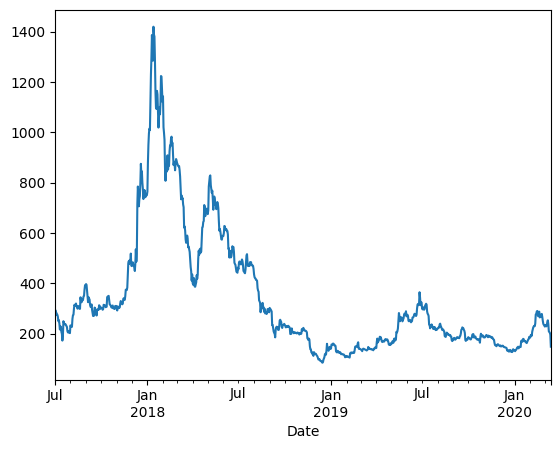

In [131]:
highs.plot()

In [132]:
eth_df.resample('W').mean()

<ipython-input-132-474b681c9b3c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eth_df.resample('W').mean()


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [133]:
eth_df.head()

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [134]:
eth_df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


# Using Bitcoin Dataset

In [50]:
import pandas as pd

In [166]:
btc_2017 = pd.read_csv('/content/BTC-2017min.csv')
btc_2018 = pd.read_csv('/content/BTC-2018min.csv')
btc_2019 = pd.read_csv('/content/BTC-2019min.csv')
btc_2020 = pd.read_csv('/content/BTC-2020min.csv')
btc_2021 = pd.read_csv('/content/BTC-2021min.csv')

In [167]:
print(btc_2017.shape)
print(btc_2018.shape)
print(btc_2019.shape)
print(btc_2020.shape)
print(btc_2021.shape)

(525599, 9)
(525599, 9)
(525599, 9)
(487722, 9)
(610782, 9)


In [168]:
# importing pandas
import pandas as pd

# merging two csv files
btc_df = pd.concat(
    map(pd.read_csv, ['/content/BTC-2017min.csv', '/content/BTC-2018min.csv',
                      '/content/BTC-2019min.csv', '/content/BTC-2020min.csv',
                      '/content/BTC-2021min.csv']), ignore_index=True)
print(btc_df)

               unix                 date   symbol      open      high  \
0        1514764740  2017-12-31 23:59:00  BTC/USD  13913.28  13913.28   
1        1514764680  2017-12-31 23:58:00  BTC/USD  13913.26  13953.83   
2        1514764620  2017-12-31 23:57:00  BTC/USD  13908.73  13913.26   
3        1514764560  2017-12-31 23:56:00  BTC/USD  13827.00  13908.69   
4        1514764500  2017-12-31 23:55:00  BTC/USD  13825.05  13825.05   
...             ...                  ...      ...       ...       ...   
2675296  1609459500  2021-01-01 00:05:00  BTC/USD  29021.86  29023.38   
2675297  1609459440  2021-01-01 00:04:00  BTC/USD  29048.13  29057.73   
2675298  1609459380  2021-01-01 00:03:00  BTC/USD  29037.68  29069.39   
2675299  1609459320  2021-01-01 00:02:00  BTC/USD  29069.80  29073.02   
2675300  1609459260  2021-01-01 00:01:00  BTC/USD  29007.31  29086.90   

              low     close  Volume BTC     Volume USD  
0        13867.18  13880.00    0.591748    8213.456549  
1        

In [165]:
btc_df.shape

(2675301, 9)

In [169]:
btc_df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1514764740,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,1514764680,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,1514764620,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,1514764560,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,1514764500,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


In [171]:
btc_df.drop('unix', axis = 1, inplace = True)

In [172]:
btc_df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549
1,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658
2,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294
3,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134
4,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130


In [173]:
btc_df.loc[0, 'date']

'2017-12-31 23:59:00'

In [174]:
btc_df['date'] = pd.to_datetime(btc_df['date'], format='%Y-%m-%d %H:%M:%S')

In [175]:
btc_df['date']

0         2017-12-31 23:59:00
1         2017-12-31 23:58:00
2         2017-12-31 23:57:00
3         2017-12-31 23:56:00
4         2017-12-31 23:55:00
                  ...        
2675296   2021-01-01 00:05:00
2675297   2021-01-01 00:04:00
2675298   2021-01-01 00:03:00
2675299   2021-01-01 00:02:00
2675300   2021-01-01 00:01:00
Name: date, Length: 2675301, dtype: datetime64[ns]

In [176]:
btc_df['DayOfWeek'] = btc_df['date'].dt.day_name()

In [177]:
btc_df

,date,symbol,open,high,low,close,Volume BTC,Volume USD,DayOfWeek
0,2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,Sunday
1,2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,Sunday
2,2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,Sunday
3,2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,Sunday
4,2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,Sunday
...,...,...,...,...,...,...,...,...,...
2675296,2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250,Friday
2675297,2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434,Friday
2675298,2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387,Friday
2675299,2021-01-01 00:02:00,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279,Friday


In [178]:
btc_df.set_index('date', inplace=True)
# inplace is used to make the changes permanentin our dataset

In [179]:
btc_df

,symbol,open,high,low,close,Volume BTC,Volume USD,DayOfWeek
date,,,,,,,,
2017-12-31 23:59:00,BTC/USD,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,Sunday
2017-12-31 23:58:00,BTC/USD,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,Sunday
2017-12-31 23:57:00,BTC/USD,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,Sunday
2017-12-31 23:56:00,BTC/USD,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,Sunday
2017-12-31 23:55:00,BTC/USD,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,Sunday
...,...,...,...,...,...,...,...,...
2021-01-01 00:05:00,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250,Friday
2021-01-01 00:04:00,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434,Friday
2021-01-01 00:03:00,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387,Friday


In [180]:
btc_df.drop('symbol', axis = 1, inplace = True)

In [181]:
btc_df

,open,high,low,close,Volume BTC,Volume USD,DayOfWeek
date,,,,,,,
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,Sunday
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,Sunday
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,Sunday
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,Sunday
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,Sunday
...,...,...,...,...,...,...,...
2021-01-01 00:05:00,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250,Friday
2021-01-01 00:04:00,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434,Friday
2021-01-01 00:03:00,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387,Friday


In [182]:
btc_df['high'].resample('D').max()


date
2017-01-01     1005.00
2017-01-02     1032.00
2017-01-03     1039.00
2017-01-04     1139.89
2017-01-05     1136.72
                ...   
2022-02-25    39727.97
2022-02-26    40330.99
2022-02-27    39886.92
2022-02-28    44256.08
2022-03-01    43750.00
Freq: D, Name: high, Length: 1886, dtype: float64

In [183]:
highs = btc_df['high'].resample('D').max()

In [184]:
%matplotlib inline

<Axes: xlabel='date'>

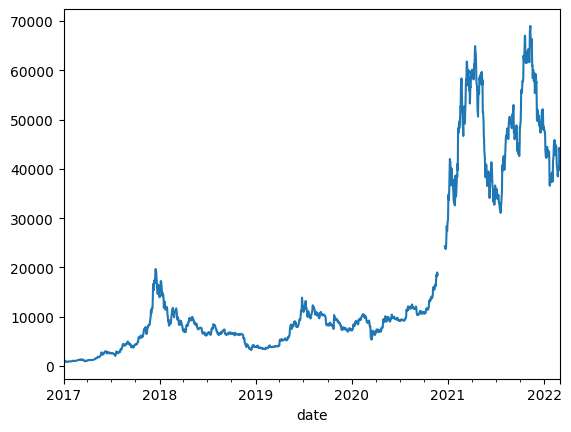

In [185]:
highs.plot()

In [186]:
lows = btc_df['low'].resample('D').min()

In [187]:
%matplotlib inline

<Axes: xlabel='date'>

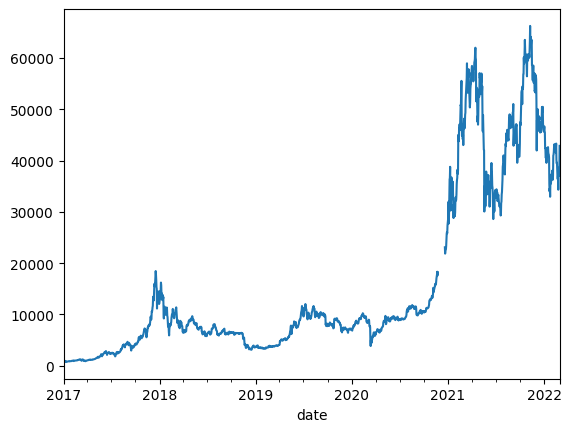

In [188]:
lows.plot()

In [189]:
btc_df.resample('W').mean()

<ipython-input-189-958082a2988f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  btc_df.resample('W').mean()


,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2017-01-01,977.256602,977.385233,977.132620,977.276060,4.760662,4701.831942
2017-01-08,981.533682,982.239760,980.745915,981.505302,13.104530,12751.448745
2017-01-15,839.596015,840.015733,839.127468,839.559408,9.206480,7611.390024
2017-01-22,888.394687,888.632197,888.157978,888.388665,5.987861,5307.219030
2017-01-29,911.423790,911.531840,911.296718,911.422007,3.048775,2767.192308
...,...,...,...,...,...,...
2022-02-06,38984.301241,38999.184365,38969.232882,38984.885394,1.391734,54176.977643
2022-02-13,43319.227088,43337.922074,43299.719429,43319.238721,1.298606,56577.927003
2022-02-20,41727.586443,41741.447174,41713.270096,41728.124043,1.083831,45232.776759


In [190]:
btc_df.head()

,open,high,low,close,Volume BTC,Volume USD,DayOfWeek
date,,,,,,,
2017-12-31 23:59:00,13913.28,13913.28,13867.18,13880.00,0.591748,8213.456549,Sunday
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19518.309658,Sunday
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10782.944294,Sunday
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9236.841134,Sunday
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,Sunday


In [191]:
btc_df.resample('D').agg({'close': 'mean', 'high': 'max', 'low': 'min', 'Volume BTC': 'sum', 'Volume USD': 'sum'})

,close,high,low,Volume BTC,Volume USD
date,,,,,
2017-01-01,977.276060,1005.00,960.53,6850.593309,6.765936e+06
2017-01-02,1012.273903,1032.00,990.01,8167.381030,8.276031e+06
2017-01-03,1020.040472,1039.00,999.99,9089.658025,9.276735e+06
2017-01-04,1076.553639,1139.89,1028.56,21562.456972,2.347651e+07
2017-01-05,1043.547951,1136.72,885.41,36018.861120,3.619081e+07
...,...,...,...,...,...
2022-02-25,38840.620868,39727.97,38027.61,2202.851827,8.596369e+07
2022-02-26,39235.267174,40330.99,38600.00,912.724087,3.590175e+07
2022-02-27,38718.646743,39886.92,37015.74,1701.817043,6.519203e+07
